              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1042
           1       0.99      0.91      0.95       752

    accuracy                           0.96      1794
   macro avg       0.96      0.95      0.96      1794
weighted avg       0.96      0.96      0.96      1794

AUC: 0.9865400518642546
Matriz de confusão:
 [[1032   10]
 [  67  685]]


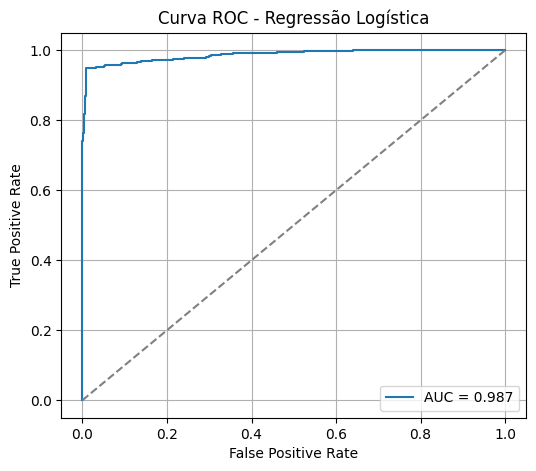


Coeficientes do modelo:
           feature      coef
0        pl_bmasse  3.864260
1          pl_rade  8.859141
2  density_from_mr  4.468033

Intercepto: 4.4255

Equação logística:
 logit(p) = 4.4255 + 3.8643*pl_bmasse + 8.8591*pl_rade + 4.4680*density_from_mr


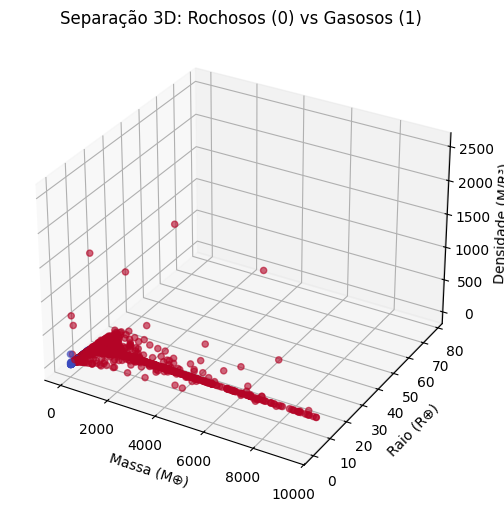

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/exoplanets.csv')

cols = ['pl_bmasse', 'pl_rade']
df = df[cols].dropna()
df = df[(df['pl_bmasse'] > 0) & (df['pl_rade'] > 0)]

df['density_from_mr'] = df['pl_bmasse'] / (df['pl_rade'] ** 3)
df['is_gas'] = (df['pl_bmasse'] > df['pl_bmasse'].median() * 1.5).astype(int)

X = df[['pl_bmasse', 'pl_rade', 'density_from_mr']]
y = df['is_gas']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()

coef_df = pd.DataFrame({'feature': X.columns, 'coef': model.coef_[0]})
intercept = model.intercept_[0]
print("\nCoeficientes do modelo:")
print(coef_df)
print(f"\nIntercepto: {intercept:.4f}")
eq = f"logit(p) = {intercept:.4f} + " + " + ".join([f"{c:.4f}*{f}" for f, c in zip(coef_df['feature'], coef_df['coef'])])
print("\nEquação logística:\n", eq)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['pl_bmasse'], df['pl_rade'], df['density_from_mr'], c=df['is_gas'], cmap='coolwarm', alpha=0.6)
ax.set_xlabel('Massa (M⊕)')
ax.set_ylabel('Raio (R⊕)')
ax.set_zlabel('Densidade (M/R³)')
ax.set_title('Separação 3D: Rochosos (0) vs Gasosos (1)')
plt.show()
